# Chaines de Markov et épidémiologie : propagation d’une épidémie dans une population

L’objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d’une épidémie dans une population.
Notre rendu constitue en ce notebook, accompagné de notre code dans le fichier projet.py.
## Binôme :
MOHELLEBI Melissa 3971070

SAICHI Lina 3803151

In [1]:
from matplotlib import *
from random import *
import numpy as np
import pandas as pd
import utils

%load_ext autoreload
%autoreload 2
import projet 



## Question 1 
Créer la matrice de transition A,contenant les probabilités de transition entre les différents états.

La matrice A : 
$$\begin{pmatrix} 0.92 & 0.08 & 0 \\ 0 & 0.93 & 0.07 \\ 0 & 0 & 1\end{pmatrix}$$

Elle est stochastique car : 
- C'est une matrice carrée.
- Tous ses élements sont positifs.
- La somme de chaque ligne est égale à 1.

In [2]:
A=np.array([[0.92, 0.08, 0], 
            [0, 0.93, 0.07], 
            [0, 0, 1]])
projet.stochastic(A)

True

Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté 

Vecteur initial : $$\begin{pmatrix} 0.9 & 0.1 & 0 \end{pmatrix}$$

In [3]:
vecteur_initial=[0.9,0.1,0]

# Modélisation d'une population


In [4]:
population = 20000
temps = 50
nom_fichier="data.csv"
projet.modelisation_population(A,vecteur_initial,population,temps,nom_fichier)
data=pd.read_csv(nom_fichier)

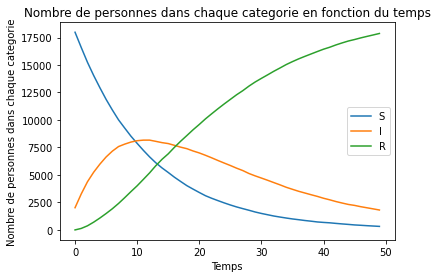

In [5]:
projet.draw_graph(data,"Nombre de personnes dans chaque categorie en fonction du temps","SIR")

Ce graphe reprèsente le nombre de personnes infectées (courbe "I") , guéries("R") et saines ("S") au cours du temps.

- Au début des observations, on remarque qu'il y a une grande majorité de personnes saines (> 17500). Un plus petit nombre de personnes sont initialement infectées (~ 2500 ).Ceci s'explique par le fait que dans notre vecteur initial, la probabilité qu'une personne soit saine est supérieure à la probabilité qu'il soit infecté.

- Entre t=0 et t=15 ,on remarque que le nombre de personnes saines décroit drastiquement (plus de 17500 à t=0 et 5000 à t=15).
Pendant ce temps là, le nombre de personnes infectées augmente, ainsi que les guerisons mais moins rapidement. On peut expliquer ce phénomene avec la vie réelle quand les personnes saines rentrent en contact avec les personnes infectées initialement, ou deviennent infectées, ainsi le nombre de personnes infectées augmentent, et le nombre de guérisons aussi vu que ces personnes peuvent passer dans cet état. 

- Le pic de l'épidemie se produit à t~10

- Enfin, entre t=15 et t=50, on remarque que le nombre de personnes saines continue de décroitre , ainsi que le nombre de gens infectés. Tandis que le nombre de personnes guéries croit vite pour atteindre plus de 17500 personnes à t=50.

- En regardant la courbe, on remarque que le nombre de personnes infectées et saines tendent vers 0 quand t -> infini, alors que de plus en plus de personnes guérissent.

- Pour regarder de plus prés ce dernier point, on augmente considérablement le temps d'observation à t=200.



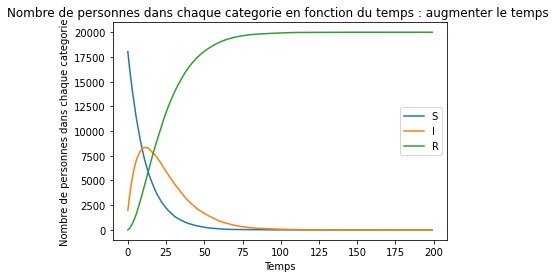

In [6]:
population = 20000
temps = 200
nom_fichier="data.csv"
projet.modelisation_population(A,vecteur_initial,population,temps,nom_fichier)
data=pd.read_csv(nom_fichier)
projet.draw_graph(data,"Nombre de personnes dans chaque categorie en fonction du temps : augmenter le temps ","SIR")

## Question 2
On remarque sur ce deuxième graphe (t=200), que quand t est très grand,le nombre de personnes infectées et saines tendent vers 0. 

Alors que le nombre de personnes guéries tend vers le nombre de personnes inital.

## Pic de l'épidémie
Estimation du nombre d’individus infectés au pic de l’épidémie.

In [7]:
projet.pic_epidemie(data)

Le pic de l'epidemie a lieu a l'instant 11 avec un nombre total de personnes infectées : 8348


## Longueur de l’infection
## Question 1


In [8]:
projet.longueur_infection_individus("data.csv")


14.36085

## Question 2
Calcul théorique de la longueur d'une sequence de I en fonction de la probabilité de rester infecte , si on est infecte au temps precedent.

Soit $X$ une variable aleatoire.
Sa valeur correspond a la longueur d'une sequence de I dans un modele SIR. Par ailleurs, elle represente le temps de guerison : le temps pendant lequel une personne reste dans l'etat infecte avant de guerir.

$X$ suit une loi geometrique de parametre $p$ egale a la probabilite de reussite = probabilite de passer de l'etat infecte a l'etat gueri dans notre modele. 
La sequence moyenne de I, correspond a l'esperance de $X$.
Nous avons $E[X] = \frac{1}{p} = \frac{1}{1-q}$ avec $q$ le complementaire de $p$ qui represente la probabilite de rester infecté.


Pour le graphe de notre modele, nous avons $q=0.94$. Avec celle valeur on obtient 
$E[X]= \frac{1}{1-0.94}=\frac{1}{0.07}=14.284$







# Modèle ergodique
Nous allons maintenant considérer un second modèle, aussi appelé modele SIS (susceptible-infected-susceptible).

Les individus guéris peuvent redevenir sains avec une probabilité de 0.04. 

La matrice du modele ergodique : 
$$\begin{pmatrix} 0.92 & 0.08 & 0 \\ 0 & 0.93 & 0.07 \\ 0.04 & 0 & 0.96\end{pmatrix}$$


In [9]:
B=np.array([[0.92, 0.08, 0], 
            [0, 0.93, 0.07], 
            [0.04, 0, 0.96]])
projet.stochastic(B)

True

In [10]:
vecteur_initial=[0.9,0.1,0]
population = 20000
temps = 50
nom_fichier="data.csv"

projet.modelisation_population(B,vecteur_initial,population,temps ,nom_fichier)
data_ergodique=pd.read_csv(nom_fichier)


# Question 1 

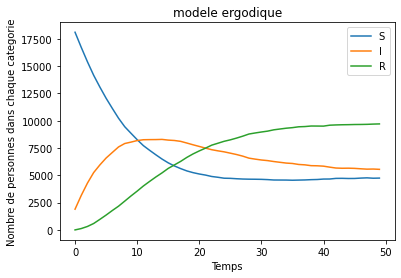

In [11]:
projet.draw_graph(data_ergodique,"modele ergodique","SIR")

- Comparaison avec les modeles précedants :


- On remarque qu'ici, le nombre de personnes infectées ne tend pas vers 0 quand t devient grand. On peut expliquer cela par le fait qu'ici nous avons toujours le risque qu'une personne rétablie redevienne infectée.

- Quand t devient grand , le nombre de personnes infectées et saines atteignent environ 5000 (25%), alors les guéries atteignent 10000 (50%)

- Le pic de l'épidemie se produit a t~10 (cela n'a pas changé car la probabilité de devenir infecté en étant sain n'a pas changé : dans la question suivante nous allons essayer de modifier pour voir ce qui se produit (: ))

## Question 2 : 
Refaire les simulations avec une autre distribution de probabilité initiale : 90% d’infectés et 10% de sains . 

In [12]:
vecteur_initial_2=[0.1,0.9,0]
population = 20000
temps = 50
nom_fichier="data.csv"


projet.modelisation_population(B,vecteur_initial_2,population,temps,nom_fichier)
data_vecteur_modifie=pd.read_csv(nom_fichier)



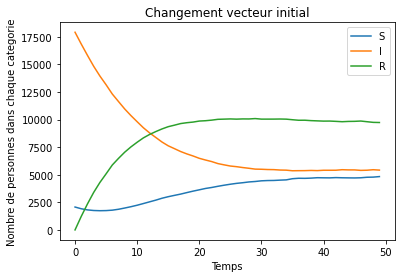

In [13]:
projet.draw_graph(data_vecteur_modifie,"Changement vecteur initial","SIR")

- Comparaison avec les modeles précedants :

- Même point soulevé qu'au graphe précedent : le nombre de personnes infectées ne tend pas vers 0 quand t devient grand. 

- Quand t  devient grand , le nombre de personnes infectées et saines atteignent environ 5000, alors les guéries atteignent 10000. 

- Le pic de l'épidemie se produit a t=0, car nous avons augmenté la probabilité qu'un individu soit infecté au point initial. Donc la proportion des gens infectés sera grande au debut de nos observations ( et pas au temps inital ou le virus commence a se propager).

## Partie 2 : 
Explorer d'autres possibilités :
## On modifie la probabilité de devenir infecté en étant sain

In [14]:
vecteur_initial=[0.9,0.1,0]
I=np.array([[0.4, 0.6, 0], 
            [0, 0.93, 0.07], 
            [0.04, 0, 0.96]])

population = 20000
temps = 50
nom_fichier="data.csv"


projet.modelisation_population(I,vecteur_initial,population,temps,nom_fichier)
data_proba_I=pd.read_csv(nom_fichier)

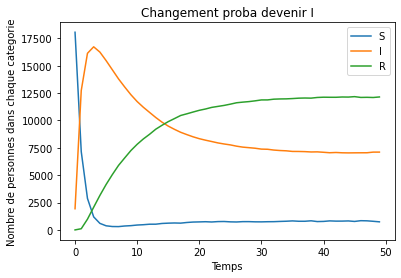

In [15]:
projet.draw_graph(data_proba_I,"Changement proba devenir I","SIR")

- Comparaison avec les modeles précedants :

- Quand t devient grand, le nombre de personnes saines tend vers 0. On peut expliquer ça par le fait que les personnes saines peuvent rapidement s'infecter encore une fois.
 
- Le nombre de personnes infectées ne tend pas vers 0, car il y a toujours un risque pour le personnes de devenir infectées ( et c'est très probable).

- Le pic de l'épidemie se produit a t=5, plus vite que dans les autres exemples, car nous avons augmenté la probabilité de devenir infecté en etant sain (le taux de contamination ). Et donc la propagation se fait plus vite.

## Question 3
Elle est récurrente positivie car la probabilité pour chaque état de revenir vers lui même est la plus probable (> 0.5).
Ce qui fait que chaque état  est réccurent(car on peut revenir sur l'état de départ) et positif( car rester sur le même état est plus probable que de chager d'état)

Elle est apériodique car chaque un de ces états possède une boucle. 

Elle est irréductible car chaque etat peut venir et partir dans n'importe quel autre état.

Cette chaine de markov est donc irréductible, récurrente positive et apériodique, donc elle est ergodique.

## Question 4
<div style="float:left;margin:0 10px 10px 0">
    <img src="Question4_ergodique.jpeg">
</div>

# Modification du modèle : confinement
## Question 1 :
Modifier le premier modèle pour créer une nouvelle matrice des probabilités de transitions A2, en diminuant la probabilité de devenir infecté en étant sain.

Matrice A2 :
$$\begin{pmatrix} 0.98 & 0.02 & 0 \\ 0 & 0.93 & 0.07 \\ 0 & 0 & 1\end{pmatrix}$$

In [16]:
A2=np.array([[0.98, 0.02, 0], 
            [0, 0.93, 0.07], 
            [0, 0, 1]])
projet.stochastic(A2)

True

In [17]:
vecteur_initial=[0.9,0.1,0]
population = 20000
temps = 50
nom_fichier="data.csv"

projet.modelisation_population(A2,vecteur_initial,population,temps,nom_fichier)
data_confinement=pd.read_csv(nom_fichier)

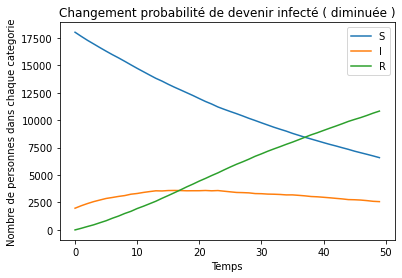

In [18]:
projet.draw_graph(data_confinement,"Changement probabilité de devenir infecté ( diminuée )","SIR")

Le but du confinement est de ralentir la propagation du virus et de limiter les contacts entre les individus.

- On remarque sur cette courbe que le nombre de personnes infectées reste bas et plutot constant.

- Le nombre de personnes saines diminue, alors que le nombre de personnes retablies augmente peu à peu.

- On peu expliquer ces phénomènes par le fait que ici, lors du confinement les personnes propagent moins le virus, ce qui implique qu'il n y a pas beaucoup de personnes infectées au même moment. 




## Question 2 


In [19]:
vecteur_initial=[1,0,0] # tous les individus sont sains
dic=projet.alternance_periodes(A,vecteur_initial,A2,20000,100)

data_alternation=pd.DataFrame.from_dict(dic) 

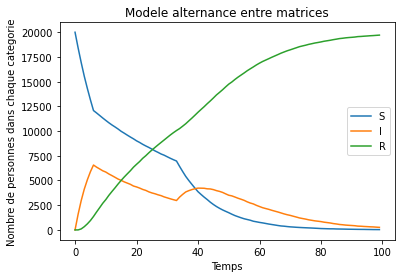

In [20]:

projet.draw_graph(data_alternation,"Modele alternance entre matrices","SIR")


On peut diviser ce graphe en 3 parties :
- De t=0 à t~8 : le nombre d'infectés augmente considerablement dans ce laps de temps la. On atteint un pic de l'épidemie à t~8 avec un nombre total de personnes infectées = 7500 (ce qui est > que 30% du nombre d'individus).

- de t~8 à t~35, le nombre de personnes infectées diminue ( instauration du confinement )

- a partir de t=35, (levée du confinement), le nombre de personnes infectées augmentent un peu ( second pic de l'epidemie) juste aprés la fin du confinement, ensuite il diminue considerablement avec le nombre de personnes saines. Contrairement aux guérisons, qui augmentent plus vite.

# Optionnel
## Question 1
## Modifier la distribution de probabilite initiale

In [21]:
A=np.array([[0.92, 0.08, 0], 
            [0, 0.93, 0.07], 
            [0, 0, 1]])

vecteur_initial=[0.5,0.5,0]
population = 20000
temps = 50
nom_fichier="data.csv"

projet.modelisation_population(A,vecteur_initial,population,temps,nom_fichier)
data_o=pd.read_csv(nom_fichier)

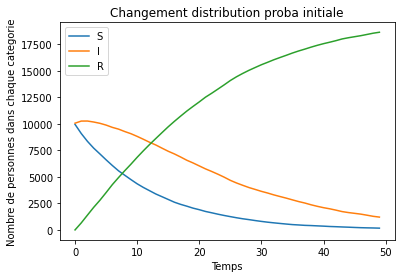

In [22]:
projet.draw_graph(data_o,"Changement distribution proba initiale","SIR")

On remarque qu'au debut il y a le meme nombre de personnes infectées et saines (vecteur initial {0.5 0.5 0}), ensuite ces deux nombre diminues considerablement. Neanmoins, on remarque que le nombre de I diminue moins rapidement car il est plus probable de rester dans cet etat et moins probable de passer a un autre etat  comparé a l'etat S.

## Modifier la taille de la population

In [23]:
A=np.array([[0.92, 0.08, 0], 
            [0, 0.93, 0.07], 
            [0, 0, 1]])

population = 200
vecteur_initial=[0.5,0.5,0]
temps = 50
nom_fichier="data.csv"

projet.modelisation_population(A,vecteur_initial,population,temps,nom_fichier)
data_o1=pd.read_csv(nom_fichier)

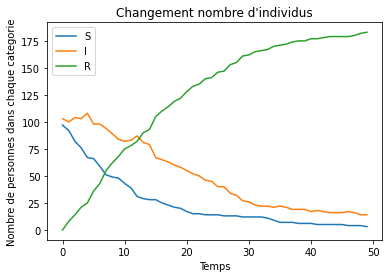

In [24]:
projet.draw_graph(data_o1,"Changement nombre d'individus","SIR")

On remarque que l'aspect general de la courbe ressemble beaucoup a celui de l'exemple precedent. Mais son aspect ne ressemble pas vraiment a celui d'une courbe. Cela revient au fait qu'il n y a pas beaucoup de personnes, et donc le faut au'une personne bascule dans un autre etat peut se remarquer directement sur l'aspect de la courbe.


## Question 2
## Limites du modèle SIR

La simplicité du modèle SIR le rend facile à mettre en place, mais simplifie beaucoup les processus pathologiques complexes. Le modèle n'intègre pas, par exemple, la période de latence entre le moment où un individu est exposé à une maladie et le moment où cet individu devient infecté et contagieux. Dans le contexte de la maladie à coronavirus 2019 (COVID-19), cela correspond au temps nécessaire au coronavirus pour se répliquer chez un individu nouvellement infecté et atteindre des niveaux suffisants pour la transmission. Des extensions du modèle SIR, comme le modèle SEIR , prennent en compte ce paramètre, mais des extensions supplémentaires du modèle seraient nécessaires pour, par exemple, modéliser l'introduction en fonction du temps de la communauté stratégies d'atténuation.

Le modèle SIR fait également plusieurs hypothèses simplificatrices sur la population. Il suppose un mélange homogène de la population, ce qui signifie que tous les individus de la population sont supposés avoir une probabilité égale d'entrer en contact les uns avec les autres. Cela ne reflète pas les structures sociales humaines, dans lesquelles la majorité des contacts se produit au sein de réseaux limités. Le modèle SIR suppose également une population fermée sans migration, naissances ou décès de causes autres que l'épidémie.

